<a href="https://colab.research.google.com/github/TiagoBem/PredictionModel/blob/main/AnaliseDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(29,)
DL_bitrate_N-1    0.919512
UL_bitrate_N-1    0.834997
DL_bitrate_N-2    0.863456
DL_bitrate_N-3    0.823790
UL_bitrate        0.911885
Name: DL_bitrate, dtype: float64
0.9195120191008724


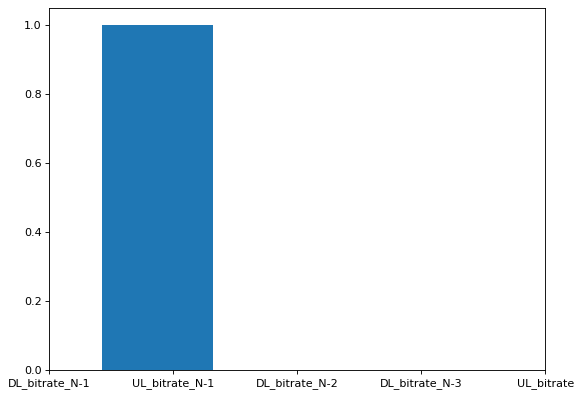

108693
0


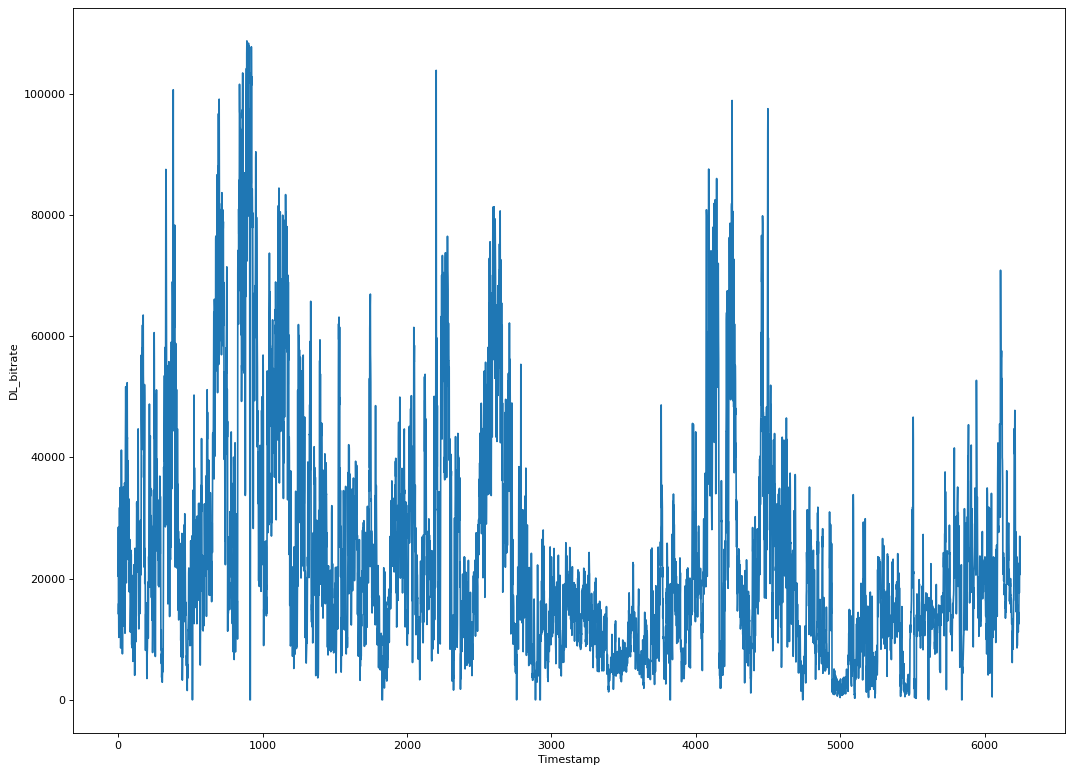

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('BiggestSeq.csv')
dataset = dataset.dropna()
dataset = dataset.loc[:,~dataset.columns.str.match("Unnamed")]

# correlacoes

correlations = dataset.corr().loc['DL_bitrate'].transpose()
print(correlations.shape)
correlations.pop('DL_bitrate')
correlations = correlations[correlations > 0.8]
print(correlations)
print(max(correlations))

labels = correlations.index
x_pos = np.arange(len(labels))

plt.figure(figsize=(8, 6), dpi=80)
plt.bar(correlations,height=1)
plt.xticks(x_pos,labels)
plt.show()

# evolucao do throughput
print(max(dataset['DL_bitrate']))
print(min(dataset['DL_bitrate']))
plt.figure(figsize=(16, 12), dpi=80)
plt.plot(dataset['DL_bitrate'])
plt.xlabel('Timestamp')
plt.ylabel('DL_bitrate')
plt.show()